In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
data = pd.read_excel('')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          18800 non-null  object        
 1   platform      18800 non-null  object        
 2   release_date  18800 non-null  datetime64[ns]
 3   summary       18686 non-null  object        
 4   meta_score    18800 non-null  int64         
 5   user_review   18800 non-null  object        
 6   producer      18800 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.0+ MB


In [ ]:
# summary statistics

# Replacing "tbd" values with NaN in both columns
data['meta_score'] = pd.to_numeric(data['meta_score'], errors='coerce')
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')
meta_score_stats = data['meta_score'].describe()
user_score_stats = data['user_review'].describe()
print("Summary statistics for meta_score:")
print(meta_score_stats)
print("\nSummary statistics for user_review:")
print(user_score_stats)

Summary statistics for meta_score:
count    18800.000000
mean        70.648883
std         12.225006
min         20.000000
25%         64.000000
50%         72.000000
75%         80.000000
max         99.000000
Name: meta_score, dtype: float64

Summary statistics for user_review:
count    17435.000000
mean         6.990846
std          1.351554
min          0.200000
25%          6.300000
50%          7.300000
75%          7.900000
max          9.700000
Name: user_review, dtype: float64


In [ ]:
# correlation analysis
# Replacing "tbd" values with NaN in both columns
data['meta_score'] = pd.to_numeric(data['meta_score'], errors='coerce')
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')
correlation = data['meta_score'].corr(data['user_review'])
print("Correlation coefficient between meta_score and user_review:")
print(correlation)

Correlation coefficient between meta_score and user_review:
0.526260488171709


Frequency count for platform:
 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: platform, dtype: int64



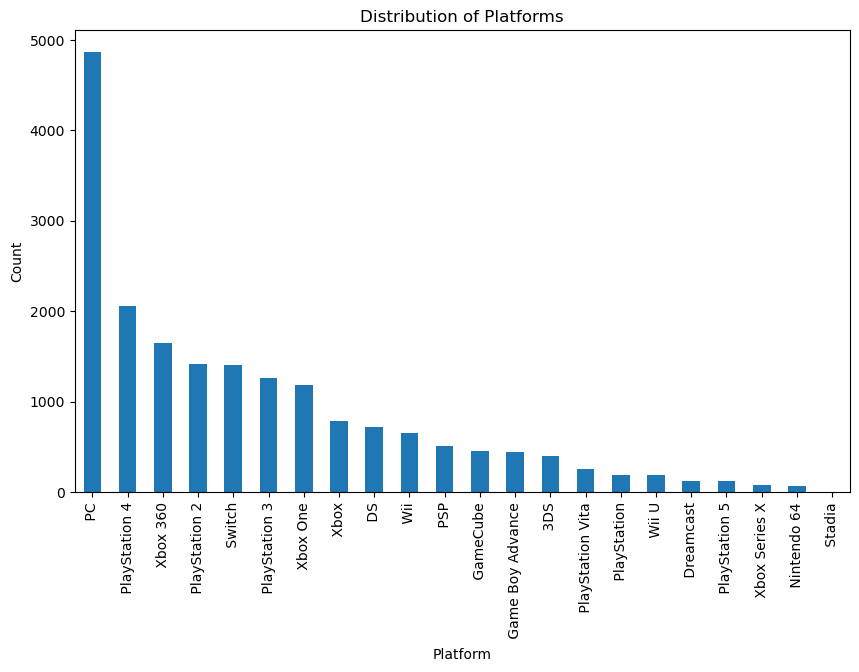

Summary statistics for meta_score and user_review based on platform:
                  meta_score                                                 \
                       count       mean        std   min    25%   50%   75%   
platform                                                                      
 3DS                   396.0  69.626263  12.314927  26.0  62.00  71.0  79.0   
 DS                    720.0  66.679167  12.420254  23.0  59.00  68.0  76.0   
 Dreamcast             125.0  74.072000  12.979622  38.0  65.00  76.0  84.0   
 Game Boy Advance      438.0  68.621005  13.041659  24.0  60.00  70.0  78.0   
 GameCube              448.0  70.953125  12.702060  23.0  63.00  71.0  80.0   
 Nintendo 64            71.0  78.436620  13.371326  39.0  73.50  81.0  88.5   
 PC                   4864.0  71.797903  11.535427  20.0  66.00  73.0  80.0   
 PSP                   512.0  68.542969  11.300820  28.0  61.00  69.5  77.0   
 PlayStation           187.0  73.342246  15.855208  25.0  65.0

In [ ]:
# frequency count for each platform
platform_counts = data['platform'].value_counts()
print("Frequency count for platform:")
print(platform_counts)
print()


plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar')
plt.title('Distribution of Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


data['meta_score'] = pd.to_numeric(data['meta_score'], errors='coerce')
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')
summary_stats = data.groupby('platform')[['meta_score', 'user_review']].describe()
print("Summary statistics for meta_score and user_review based on platform:")
print(summary_stats)


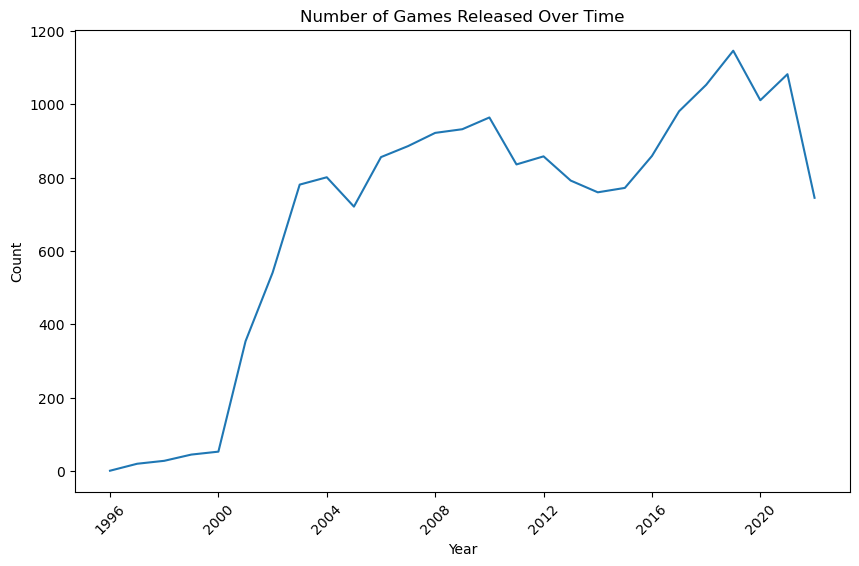

In [ ]:
# Time base analysis

# Converting the "release_date" column to datetime
data['release_date'] = pd.to_datetime(data['release_date'])

# Setting the "release_date" column as the index
data.set_index('release_date', inplace=True)

# Resampling the data by a specific time period
resampled_data = data.resample('Y').count()

# Visualizing the time-based analysis (according to year)
plt.figure(figsize=(10, 6))
plt.plot(resampled_data.index, resampled_data['name'])
plt.title('Number of Games Released Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Grouping the data by "platform" and calculate the mean of "meta_score" and "user_review"
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')
platform_ratings = data.groupby('platform').agg({'meta_score': 'mean', 'user_review': 'mean'})
print(platform_ratings)

                  meta_score  user_review
platform                                 
3DS                69.626263     7.103968
DS                 66.679167     7.126878
Dreamcast          74.072000     7.870588
Game Boy Advance   68.621005     7.467049
GameCube           70.953125     7.430751
Nintendo 64        78.436620     7.954930
PC                 71.797903     6.918197
PSP                68.542969     7.267888
PlayStation        73.342246     7.722289
PlayStation 2      68.946959     7.532494
PlayStation 3      70.710191     6.924669
PlayStation 4      71.041342     6.492256
PlayStation 5      75.427419     6.665455
PlayStation Vita   71.062257     7.267729
Stadia             69.800000     7.380000
Switch             72.523231     7.171053
Wii                65.806107     7.091625
Wii U              72.423913     7.312155
Xbox               70.053232     7.156997
Xbox 360           68.867397     6.915643
Xbox One           72.395250     6.473186
Xbox Series X      75.987013     6

In [ ]:
# determining whether there are significant differences between the distributions of platfroms and user_review
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')

# Creating separate series for user_review for each platform
platforms = data['platform'].unique()
platform_reviews = {}
for platform in platforms:
    platform_reviews[platform] = data[data['platform'] == platform]['user_review']

# Performing Kruskal-Wallis test to compare user_reviews between platforms
_, p_value = kruskal(*platform_reviews.values(), nan_policy='omit')

print("Kruskal-Wallis p-value:", p_value)

# this p-value can show that the user reviews significantly vary across different platforms.

Kruskal-Wallis p-value: 1.2854824542765423e-288


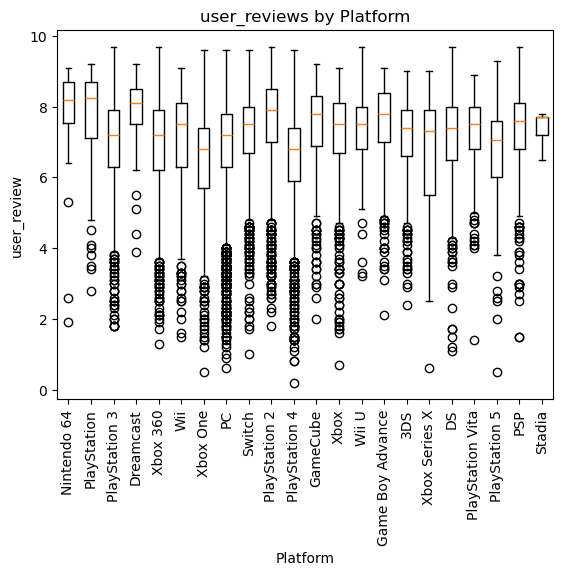

In [ ]:
# user_reviews for each platform

# Replacing "tbd" values with NaN
data['user_review'] = data['user_review'].replace('tbd', np.nan)

# Getting unique platforms from the dataset
platforms = data['platform'].unique()

# Creating an empty list to store the user_reviews for each platform
user_review = []

for platform in platforms:
    platform_data = data[data['platform'] == platform]
    scores = platform_data['user_review'].dropna().astype(float)

    user_review.append(scores)

#Visualizing user_reviews for each platform
plt.boxplot(user_review, labels=platforms)
plt.xlabel('Platform')
plt.ylabel('user_review')
plt.title('user_reviews by Platform')
plt.xticks(rotation=90)
plt.show()

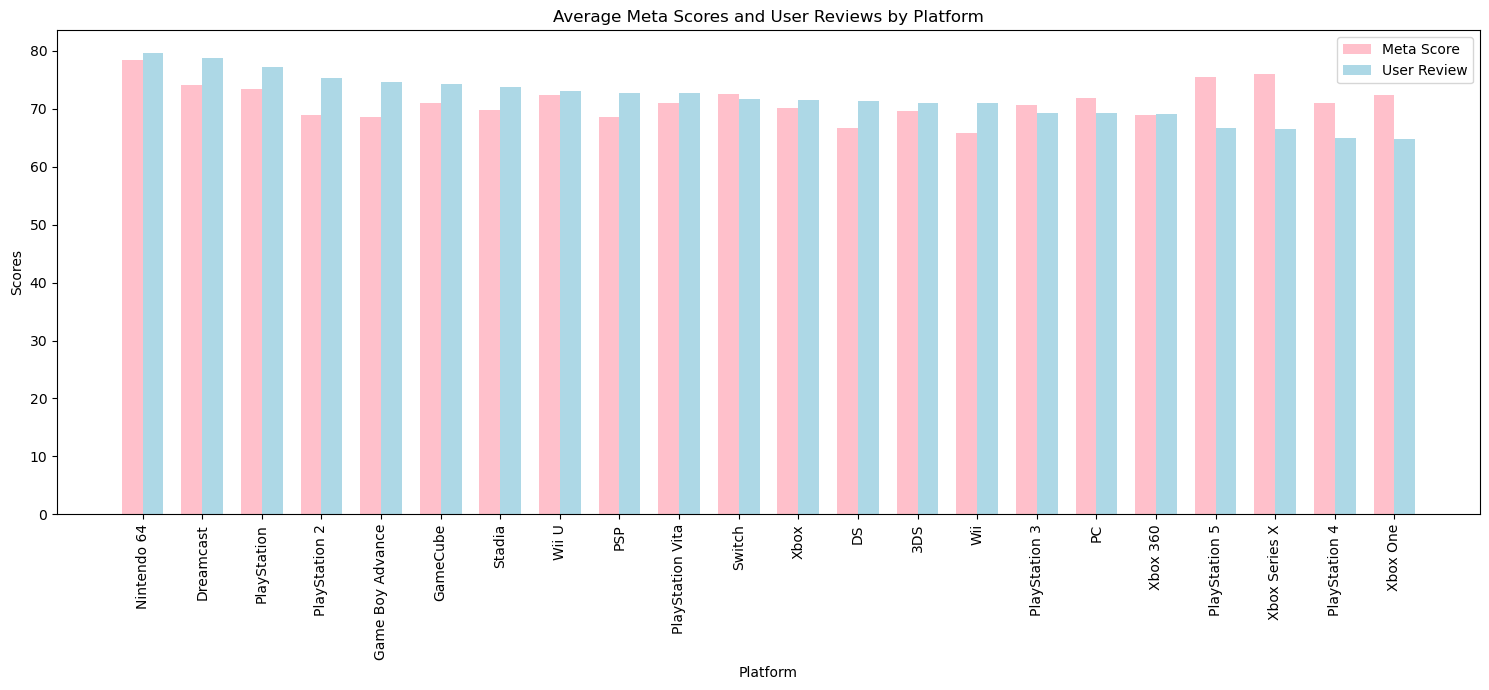

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data['user_review'] = data['user_review'].replace('tbd', np.nan).dropna().astype(float)
data['meta_score'] = data['meta_score'].dropna().astype(float)

# Get unique platforms
platforms = data['platform'].unique()

# Containers for average scores
avg_user_reviews = []
avg_meta_scores = []

# Calculatting average user reviews and meta scores for each platform
for platform in platforms:
    platform_data = data[data['platform'] == platform]

    # User reviews, normalized to a 0-100 scale
    avg_user_reviews.append(platform_data['user_review'].mean() * 10)

    # Meta scores
    avg_meta_scores.append(platform_data['meta_score'].mean())

# Creating a DataFrame with the averages
platform_scores = pd.DataFrame({
    'Platform': platforms,
    'Average User Review': avg_user_reviews,
    'Average Meta Score': avg_meta_scores
})

# Sortting the DataFrame by 'Average User Review' in descending order
platform_scores_sorted = platform_scores.sort_values(by='Average User Review', ascending=False)


pos = np.arange(len(platform_scores_sorted))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(15, 7))
meta_bar = ax.bar(pos - bar_width/2, platform_scores_sorted['Average Meta Score'], bar_width, label='Meta Score', color='pink')
user_bar = ax.bar(pos + bar_width/2, platform_scores_sorted['Average User Review'], bar_width, label='User Review', color='lightblue')

ax.set_xlabel('Platform')
ax.set_ylabel('Scores')
ax.set_title('Average Meta Scores and User Reviews by Platform')
ax.set_xticks(pos)
ax.set_xticklabels(platform_scores_sorted['Platform'], rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


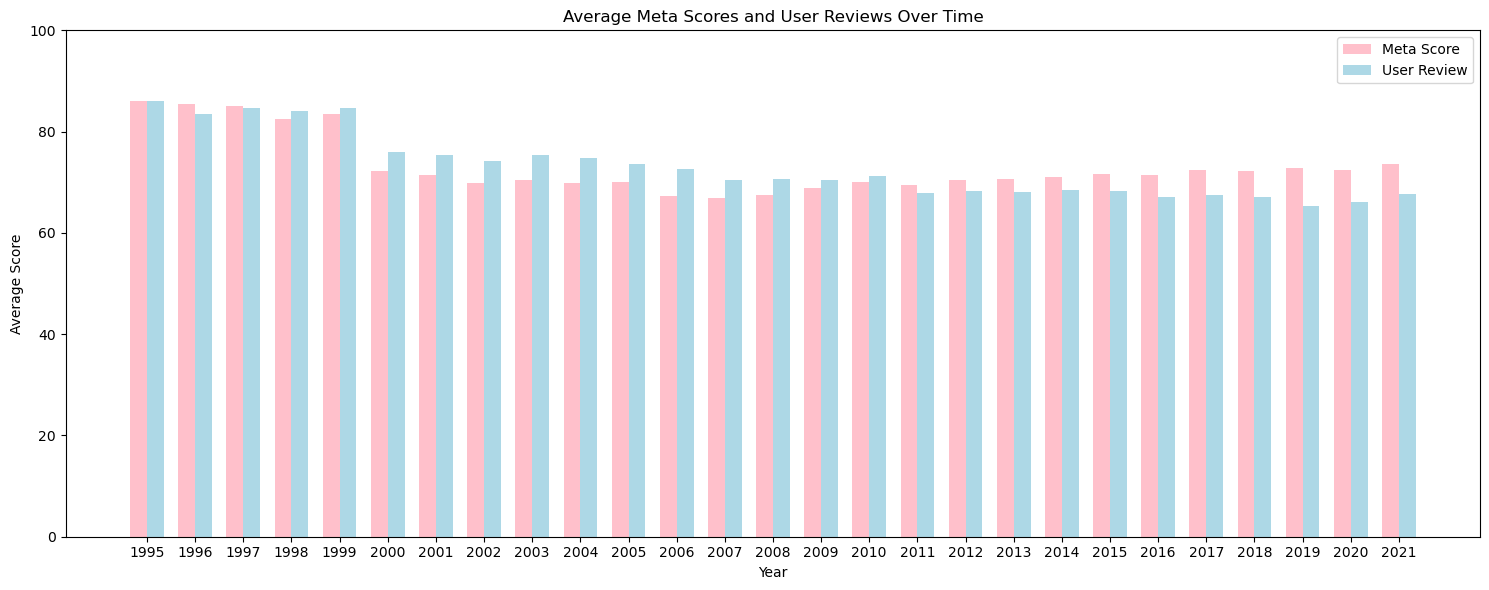

In [ ]:
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce') *10
data['meta_score'] = pd.to_numeric(data['meta_score'], errors='coerce')

data['release_date'] = pd.to_datetime(data['release_date'])
average_scores = data.groupby(data['release_date'].dt.year)[['meta_score', 'user_review']].mean()
average_scores['user_review'] = average_scores['user_review']
num_years = average_scores.shape[0]
x = np.arange(num_years)
bar_width = 0.35


fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x, average_scores['meta_score'], width=bar_width, label='Meta Score', color='pink')
ax.bar(x + bar_width, average_scores['user_review'], width=bar_width, label='User Review', color='lightblue')
ax.set_title('Average Meta Scores and User Reviews Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')
ax.set_ylim(0, 100)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(average_scores.index)
ax.legend()
plt.tight_layout()
plt.show()

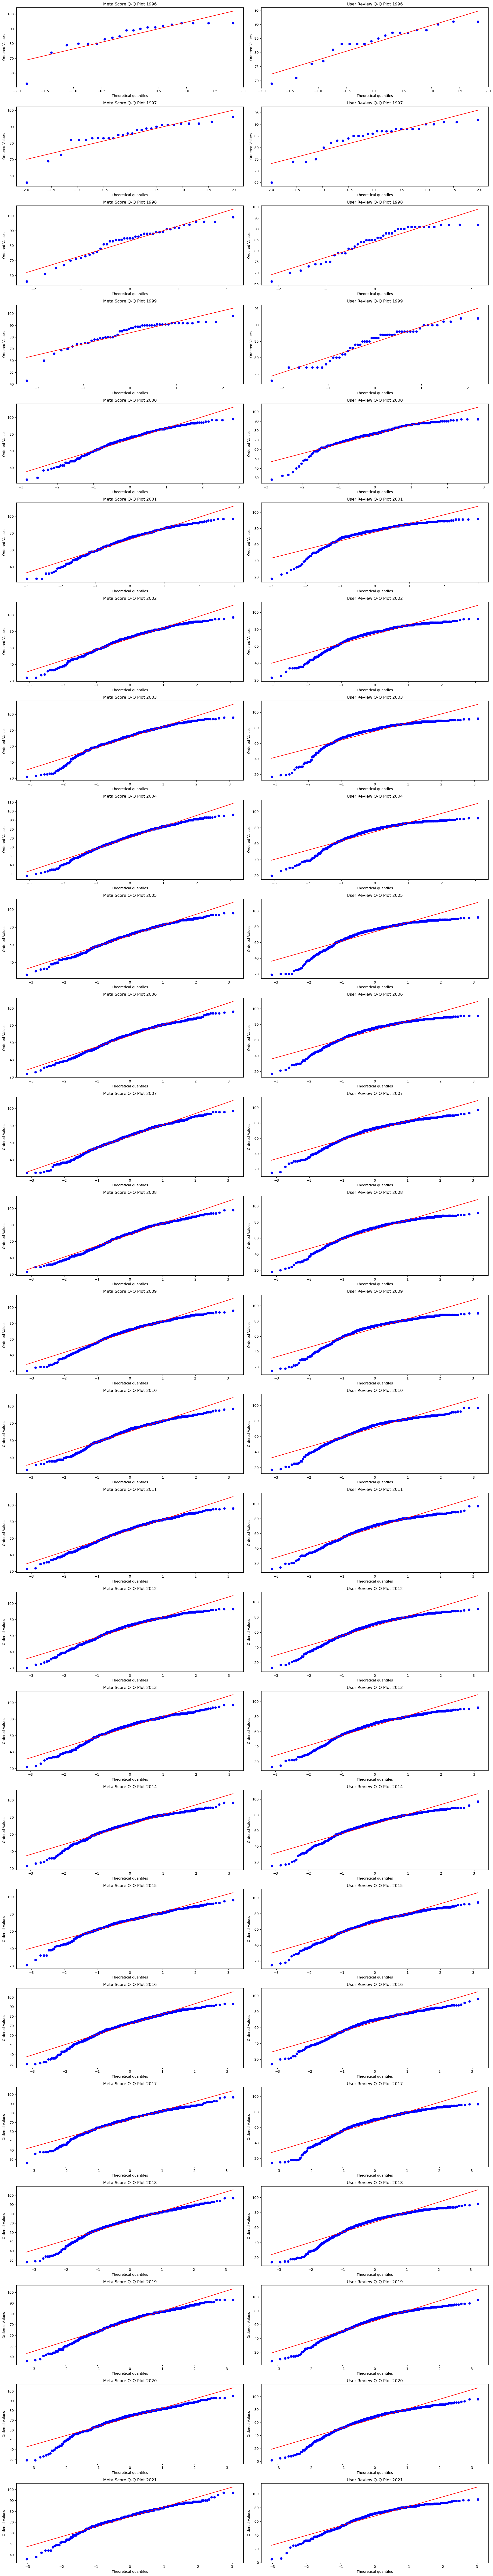

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import pandas as pd

# We'll multiply the 'user_review' scores by 10 to match the scale the 'meta_score'.
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce') * 10

# Drop any NaN values that may have resulted from the conversion.
data.dropna(subset=['meta_score', 'user_review'], inplace=True)

# Now we have our data ready, sorted by years.
years = sorted(data['year'].unique())
num_years = len(years)

# First, find out how many years we have
years = sorted(data['year'].unique())
num_years = len(years)

# Create a figure with subplots arranged in a grid: one row for each year, two columns for Meta Scores and User Reviews
fig = plt.figure(figsize=(20, 4 * num_years))
gs = gridspec.GridSpec(num_years, 2, figure=fig)

for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    year_data = data[data['year'] == year]

    # Meta Score Q-Q plot for the current year
    ax1 = fig.add_subplot(gs[i, 0])
    stats.probplot(year_data['meta_score'], dist="norm", plot=ax1)
    ax1.title.set_text(f'Meta Score Q-Q Plot {year}')

    # User Review Q-Q plot for the current year
    ax2 = fig.add_subplot(gs[i, 1])
    stats.probplot(year_data['user_review'], dist="norm", plot=ax2)
    ax2.title.set_text(f'User Review Q-Q Plot {year}')


plt.tight_layout()
plt.show()



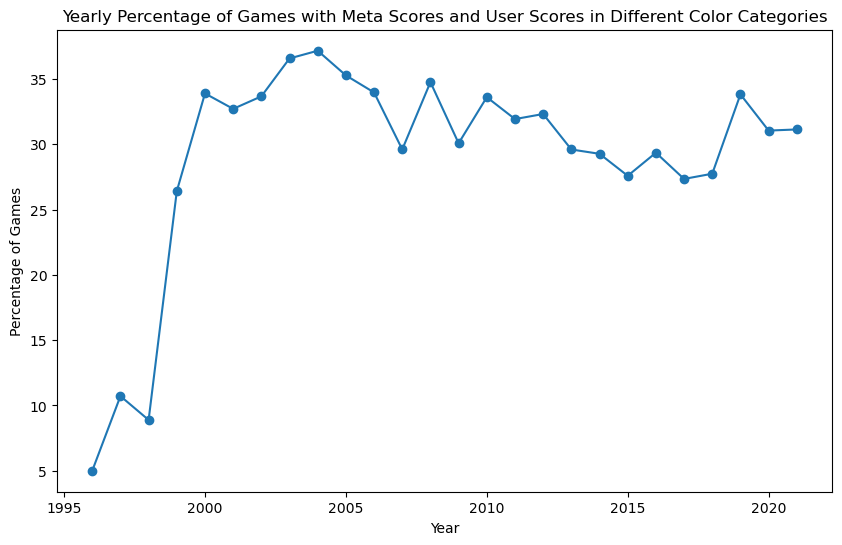

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring the columns are numeric and scale user scores to be out of 100
data['user_score_percent'] = pd.to_numeric(data['user_review'], errors='coerce') * 10
data['meta_score_percent'] = pd.to_numeric(data['meta_score'], errors='coerce')

color_categories = {
    'Green': (80, 100),
    'Yellow': (50, 79),
    'Red': (0, 49)
}

# Filtering the data based on the condition that critic score and user score fall into different color categories
filtered_data = data[
    ((data['meta_score_percent'] >= color_categories['Green'][0]) & (data['user_score_percent'] < color_categories['Green'][0])) |
    ((data['meta_score_percent'] < color_categories['Green'][0]) & (data['user_score_percent'] >= color_categories['Green'][0])) |
    ((data['meta_score_percent'] >= color_categories['Yellow'][0]) & (data['user_score_percent'] < color_categories['Yellow'][0])) |
    ((data['meta_score_percent'] < color_categories['Yellow'][0]) & (data['user_score_percent'] >= color_categories['Yellow'][0])) |
    ((data['meta_score_percent'] >= color_categories['Red'][1]) & (data['user_score_percent'] < color_categories['Red'][1])) |
    ((data['meta_score_percent'] < color_categories['Red'][1]) & (data['user_score_percent'] >= color_categories['Red'][1]))
]

# Converting release_date to datetime and extracting the year
data['year'] = pd.to_datetime(data['release_date']).dt.year

# Group by year and count the number of games per year
games_by_year = data.groupby('year')['name'].count()
filtered_games_by_year = filtered_data.groupby('year')['name'].count()

# Calculating the percentage of games that meet the condition for each year
percentage_of_games = (filtered_games_by_year / games_by_year) * 100

# Plotting the trend of the percentage of games over the years
plt.figure(figsize=(10, 6))
percentage_of_games.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Games')
plt.title('Yearly Percentage of Games with Meta Scores and User Scores in Different Color Categories')
plt.show()


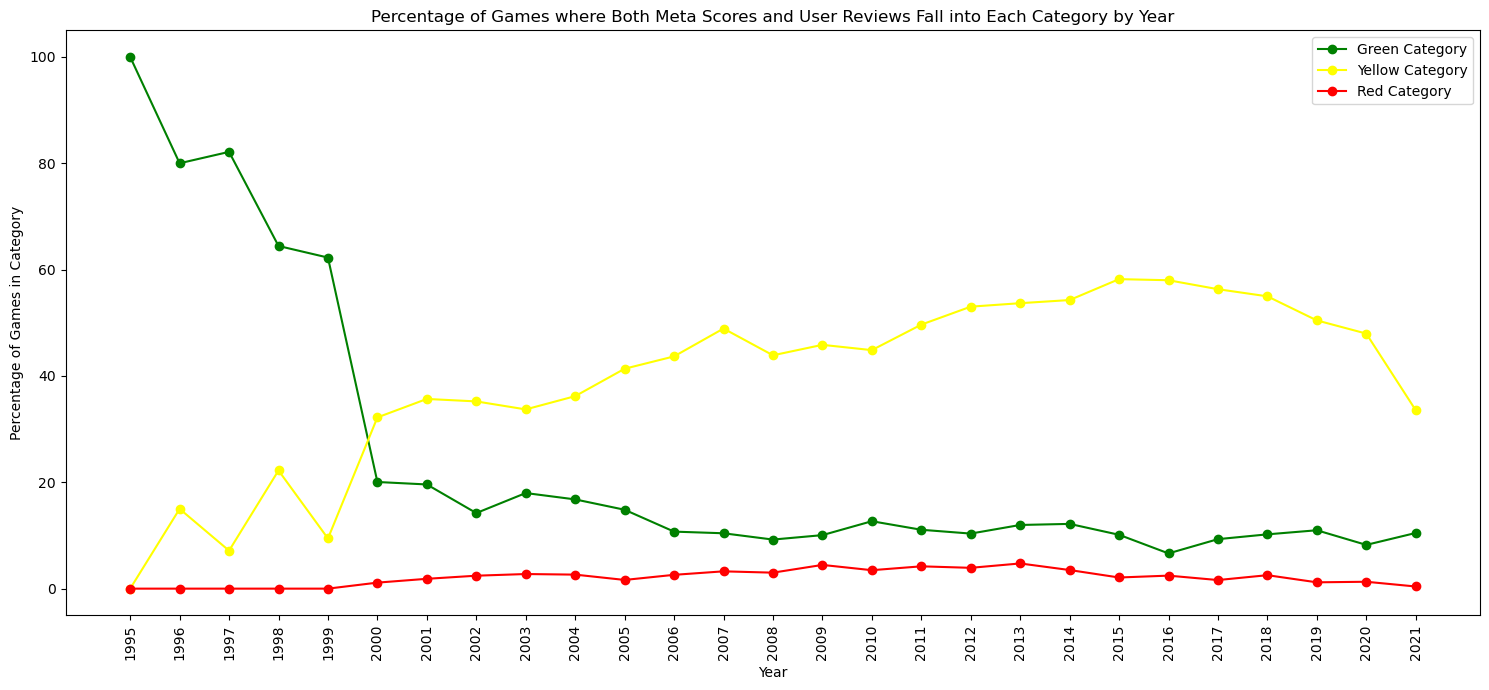

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertting scores to percentages and scale user reviews to be out of 100
data['user_score_percent'] = pd.to_numeric(data['user_review'], errors='coerce') * 10
data['meta_score_percent'] = pd.to_numeric(data['meta_score'], errors='coerce')

# Defining the score categories
score_categories = {
    'Green': (80, 100),
    'Yellow': (50, 79),
    'Red': (0, 49)
}

# Preparing the data frame for each category
category_data = {}
for category, (low, high) in score_categories.items():
    category_data[category] = data[(data['meta_score_percent'] >= low) & (data['meta_score_percent'] <= high) &
                                   (data['user_score_percent'] >= low) & (data['user_score_percent'] <= high)]

# Group by year and count the number of games for each category
total_games_by_year = data.groupby(data['release_date'].dt.year)['name'].count()
all_years = range(data['release_date'].dt.year.min(), data['release_date'].dt.year.max() + 1)
total_games_by_year = total_games_by_year.reindex(all_years, fill_value=0)

# Calculating the percentage of games in each category per year
percentage_of_category_games = {}
for category in score_categories:
    games_by_year = category_data[category].groupby(category_data[category]['release_date'].dt.year)['name'].count().reindex(all_years, fill_value=0)
    percentage_of_category_games[category] = (games_by_year / total_games_by_year) * 100


plt.figure(figsize=(15, 7))
colors = {'Green': 'green', 'Yellow': 'yellow', 'Red': 'red'}

for category, percentages in percentage_of_category_games.items():
    plt.plot(percentages.index, percentages, marker='o', color=colors[category], label=f'{category} Category')

plt.xlabel('Year')
plt.ylabel('Percentage of Games in Category')
plt.title('Percentage of Games where Both Meta Scores and User Reviews Fall into Each Category by Year')
plt.xticks(list(all_years), rotation=90)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


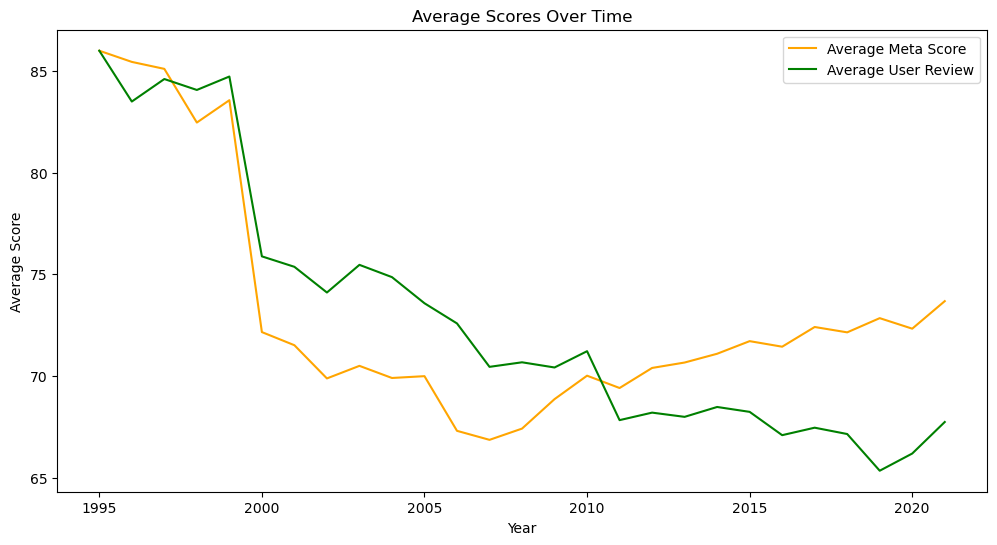

In [ ]:
data['meta_score'] = pd.to_numeric(data['meta_score'], errors='coerce')
data['user_review'] = pd.to_numeric(data['user_review'], errors='coerce')*10
data['release_date'] = pd.to_datetime(data['release_date'])
data['year'] = data['release_date'].dt.year

yearly_data = data.groupby('year').agg({
    'meta_score': 'mean',
    'user_review': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['meta_score'], label='Average Meta Score', color='orange')
plt.plot(yearly_data['year'], yearly_data['user_review'], label='Average User Review', color='green')
plt.title('Average Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.show()

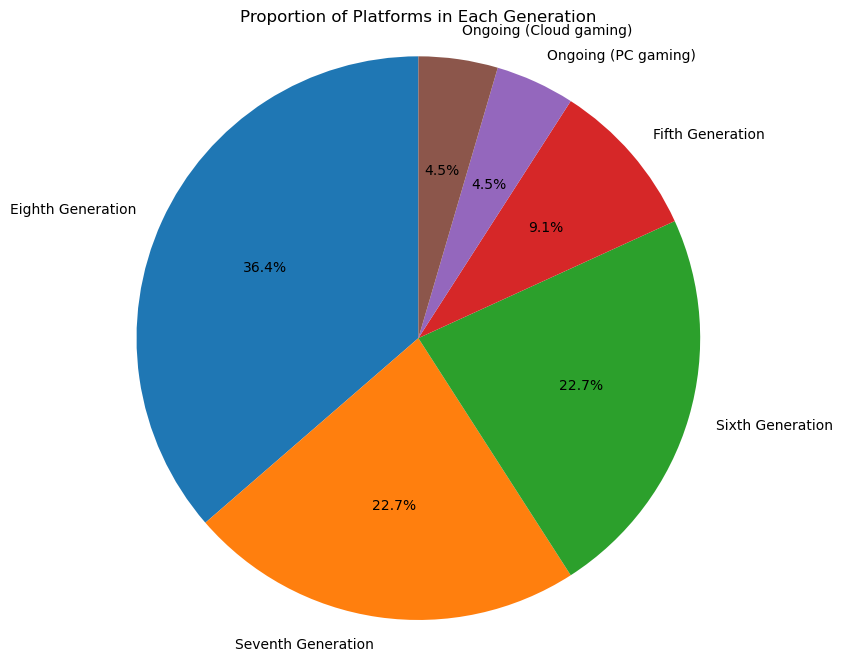

In [ ]:
generation_mapping = {
    '3DS': 'Eighth Generation',
    'DS': 'Seventh Generation',
    'Dreamcast': 'Sixth Generation',
    'Game Boy Advance': 'Sixth Generation',
    'GameCube': 'Sixth Generation',
    'Nintendo 64': 'Fifth Generation',
    'PC': 'Ongoing (PC gaming)',
    'PSP': 'Seventh Generation',
    'PlayStation': 'Fifth Generation',
    'PlayStation 2': 'Sixth Generation',
    'PlayStation 3': 'Seventh Generation',
    'PlayStation 4': 'Eighth Generation',
    'PlayStation 5': 'Eighth Generation',
    'PlayStation Vita': 'Eighth Generation',
    'Stadia': 'Ongoing (Cloud gaming)',
    'Switch': 'Eighth Generation',
    'Wii': 'Seventh Generation',
    'Wii U': 'Eighth Generation',
    'Xbox': 'Sixth Generation',
    'Xbox 360': 'Seventh Generation',
    'Xbox One': 'Eighth Generation',
    'Xbox Series X': 'Eighth Generation'
}


data = pd.DataFrame({
    'Platform': ['3DS', 'DS', 'Dreamcast', 'Game Boy Advance', 'GameCube', 'Nintendo 64', 'PC', 'PSP',
                 'PlayStation', 'PlayStation 2', 'PlayStation 3', 'PlayStation 4', 'PlayStation 5',
                 'PlayStation Vita', 'Stadia', 'Switch', 'Wii', 'Wii U', 'Xbox', 'Xbox 360', 'Xbox One',
                 'Xbox Series X']
})
data['Generation'] = data['Platform'].map(generation_mapping)

# Counting the number of platforms in each generation
generation_counts = data['Generation'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Platforms in Each Generation')
plt.axis('equal')
plt.show()